In [50]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [51]:
df_soja = pd.read_csv(r'https://raw.githubusercontent.com/lucas-souza-s/Commodities-e-previsao-de-series-temporais/main/db_soja_modificado/db_pr%C3%A9_processado_dolar.csv',
                              encoding='utf8',
                              delimiter=',',
                              parse_dates=True,
                              index_col=0,
                              verbose=True)

C:\Users\Lucas S\AppData\Local\Temp\ipykernel_19440\3822230375.py:1: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  df_soja = pd.read_csv(r'https://raw.githubusercontent.com/lucas-souza-s/Commodities-e-previsao-de-series-temporais/main/db_soja_modificado/db_pr%C3%A9_processado_dolar.csv',


Tokenization took: 23.94 ms
Type conversion took: 60.84 ms
Parser memory cleanup took: 0.00 ms


In [52]:
df_soja

,preco,residuos,tendencia,sazonalidade,diff_1,diff_2,diff_3,diff_4,diff_5
data,,,,,,,,,
2006-04-17,12.77,-0.041693,12.766333,-0.007283,0.06,0.11,0.17,0.23,0.23
2006-04-18,12.88,-0.089374,12.790000,-0.007207,0.11,0.17,0.22,0.28,0.34
2006-04-19,12.82,-0.263051,12.817667,-0.011955,-0.06,0.05,0.11,0.16,0.22
2006-04-20,12.75,-0.251368,12.851500,-0.038478,-0.07,-0.13,-0.02,0.04,0.09
2006-04-21,12.80,-0.131594,12.882667,-0.038412,0.05,-0.02,-0.08,0.03,0.09
...,...,...,...,...,...,...,...,...,...
2023-12-09,29.76,-0.130305,29.722667,-0.022104,0.01,0.18,0.32,0.43,0.46
2023-12-10,29.76,-0.197523,29.740333,0.007040,0.00,0.01,0.18,0.32,0.43
2023-12-11,29.77,-0.259429,29.757167,0.005083,0.01,0.01,0.02,0.19,0.33


In [53]:
y = df_soja['diff_1']
n_train = int(len(y) * 0.8)
n_test = len(y) - n_train
y_train, y_test = y.iloc[:n_train], y.iloc[n_train:]

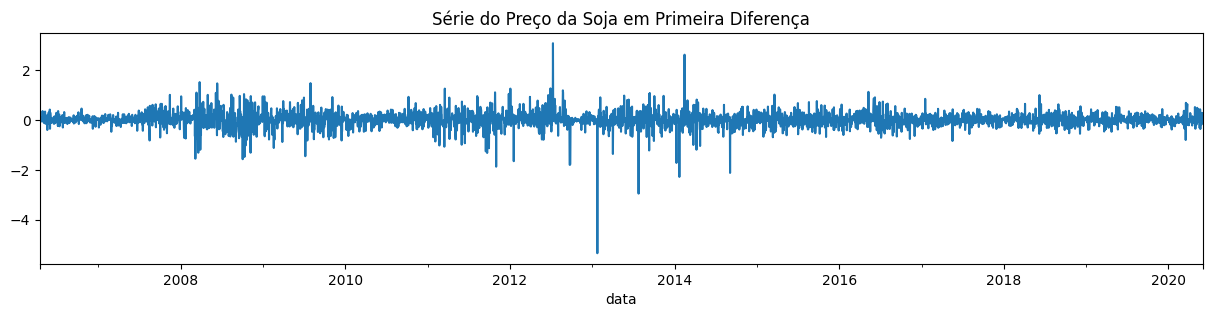

In [54]:
y_train.plot(figsize=(15, 3), title='Série do Preço da Soja em Primeira Diferença');

<Axes: >

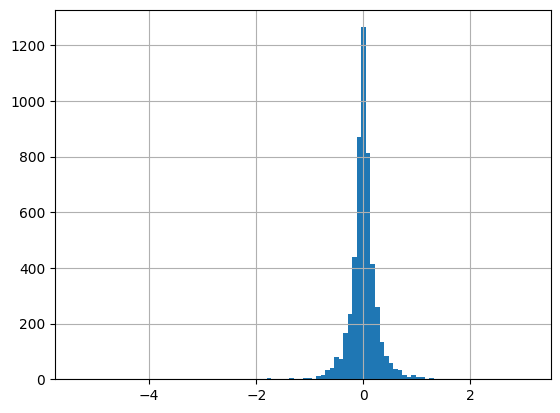

In [6]:
# Histogram of y_train
y_train.hist(bins=100)

In [41]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [49]:
adfuler = adfuller(df_soja['diff_1'], autolag="AIC")
dfoutput = pd.Series(adfuler[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in adfuler[4].items(): # type: ignore
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                  -53.010235
p-value                           0.000000
Lags Used                         1.000000
Number of Observations Used    6448.000000
Critical Value (1%)              -3.431365
Critical Value (5%)              -2.861988
Critical Value (10%)             -2.567009
dtype: float64


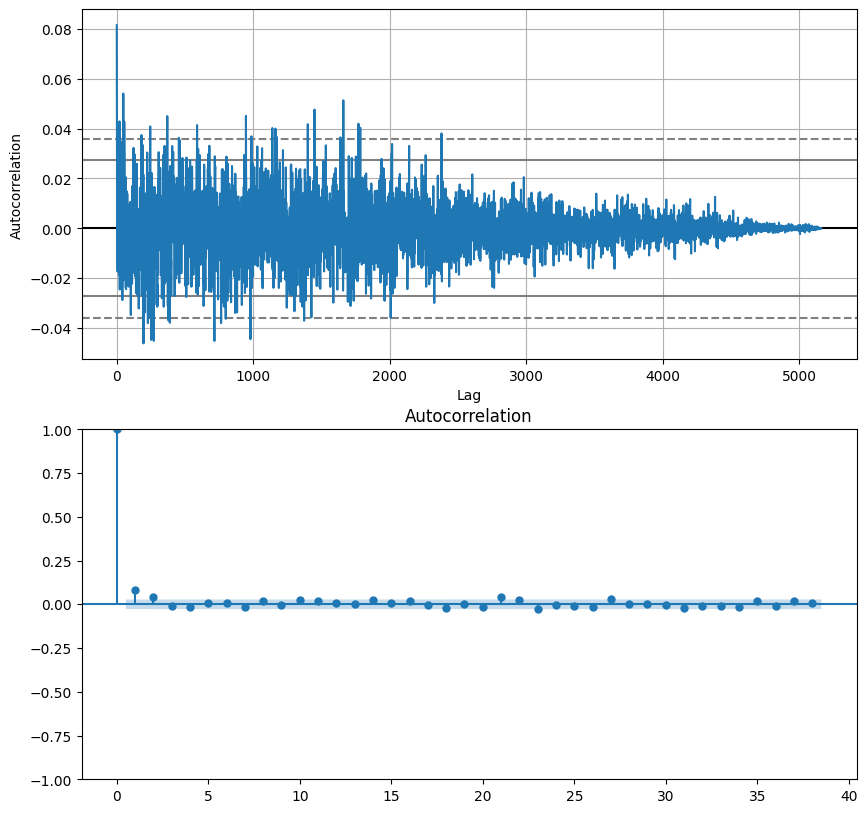

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
# Plot autocorrelation
autocorrelation_plot(y_train, ax=ax1)
# Plot ACF
plot_acf(y_train, ax=ax2)
plt.show()

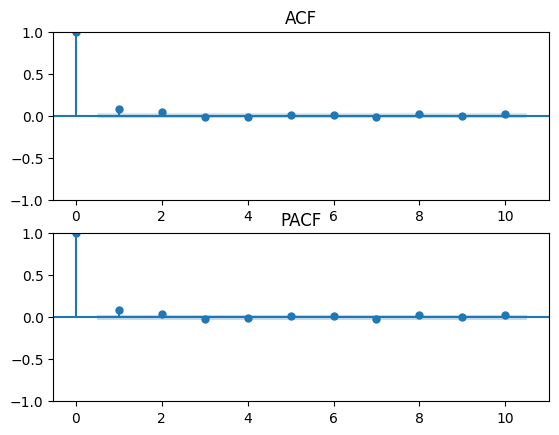

In [35]:
# ACF e PACF da Amostra de Teste
fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y_train.values.squeeze(), lags=10, ax=ax1, title="ACF")
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y_train.values.squeeze(), lags=10, ax=ax2, title="PACF")

É possível observar auto correlação.

In [55]:
# Modelo AR(1)
mod_ar1 = sm.tsa.arima.ARIMA(y_train, order=(1, 0, 0), trend='n', freq='D')

# Resultados do Modelo AR(1)
res_ar1 = mod_ar1.fit()
print(res_ar1.summary())

c:\Users\Lucas S\OneDrive\Documents\ADM_UFPB\TCC1\TCC\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 diff_1   No. Observations:                 5160
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -790.286
Date:                Tue, 07 May 2024   AIC                           1584.573
Time:                        23:02:04   BIC                           1597.670
Sample:                    04-17-2006   HQIC                          1589.156
                         - 06-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0815      0.009      9.129      0.000       0.064       0.099
sigma2         0.0795      0.000    222.761      0.000       0.079       0.080
Ljung-Box (L1) (Q):                   0.05   Jarque-

$y = 0.0815 \theta_{t-1} $

c:\Users\Lucas S\OneDrive\Documents\ADM_UFPB\TCC1\TCC\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


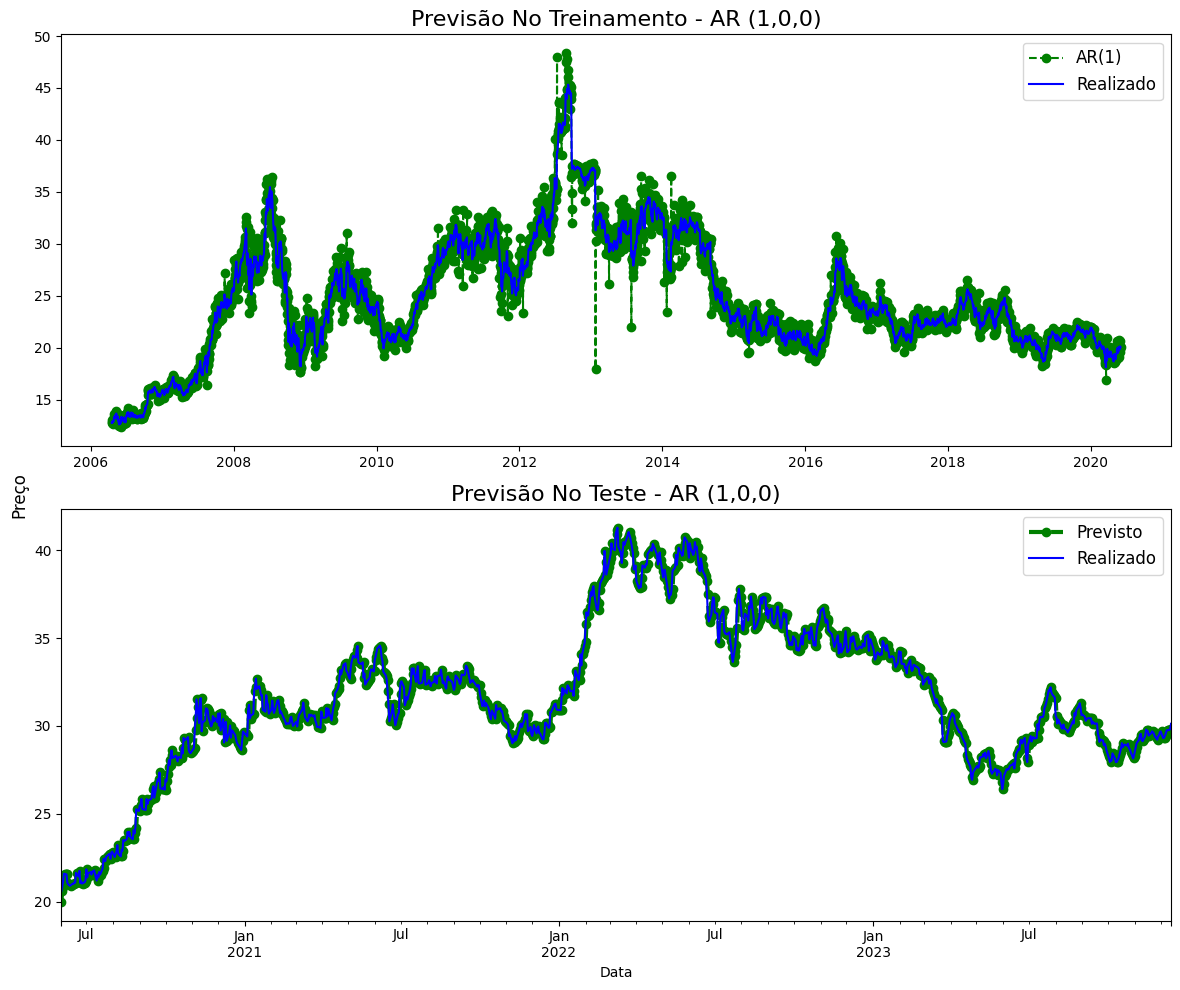

In [84]:
# In-Sample Results
from turtle import color


pred_ar1 = res_ar1.predict(params=res_ar1.params)
df_soja['AR1'] = df_soja['preco'].shift(1) * (1 + pred_ar1)

# Out-of-Sample Forecast
y_forecast = res_ar1.forecast(steps=n_test)
y_realizado = df_soja['diff_1'].loc[y_forecast.index]
p_realizado = df_soja['preco'].loc[y_forecast.index]
df_soja['preco_lag1'] = df_soja['preco'].shift(1)
p_forecast = df_soja['preco_lag1'].loc[y_forecast.index] * (1+y_forecast)
p_forecast = p_forecast.dropna()

# Calculating metrics
mape_ar = mean_absolute_percentage_error(p_realizado, p_forecast)
mse_ar = mean_squared_error(p_realizado, p_forecast, squared=True)

# Create a figure and axes objects
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot in-sample results
ax1.plot(df_soja['AR1'], label='AR(1)', linestyle='--',color='green', marker='o')
ax1.plot(df_soja['preco'].iloc[:n_train], label='Realizado', color='blue')

ax1.set_title('Previsão No Treinamento - AR (1,0,0)', fontsize=16)
ax1.legend(fontsize=12)

# Plot out-of-sample results
p_forecast.plot(ax=ax2, label='Previsto', legend=True, linestyle='--', linewidth=3, color='green', marker='o')
p_realizado.plot(ax=ax2, label='Realizado', legend=True, color='blue')

ax2.set_title('Previsão No Teste - AR (1,0,0)', fontsize=16)
ax2.set_xlabel('Data')
ax2.legend(fontsize=12)

# Set common ylabel
fig.supylabel('Preço')
# Show the plot
plt.tight_layout()
plt.show()

<Axes: >

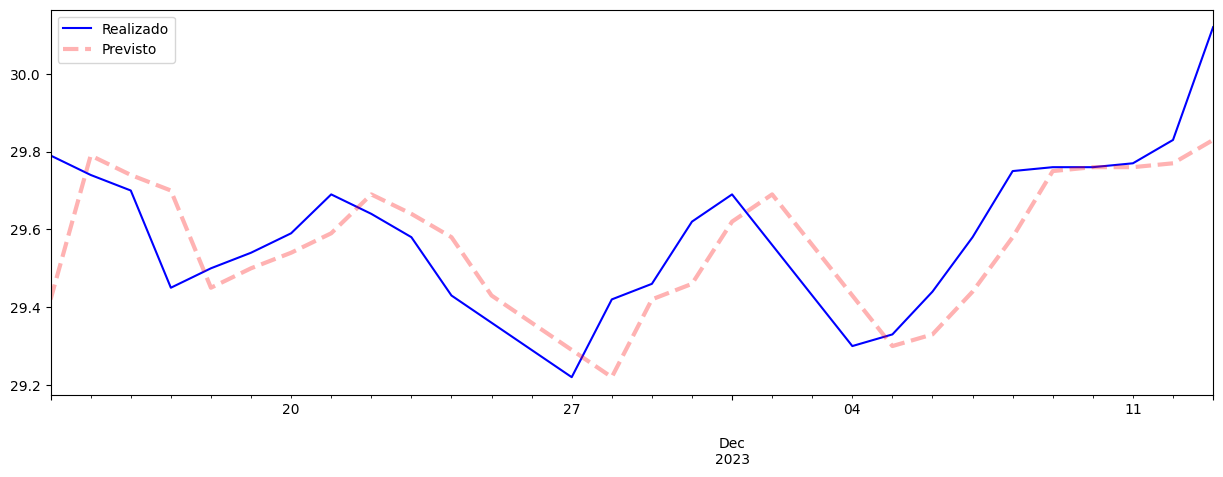

In [34]:
# Plot the last 30 days of data and the four out-of-sample forecasts
p_realizado.iloc[-30:].plot(figsize=(15, 5), label='Realizado', legend=True, color='blue')
p_forecast.iloc[-30:].plot(label='Previsto', legend=True, alpha=0.3, linestyle='--', color='red', linewidth=3)